In [81]:
f = open('IV-1N4148.txt','r')
a = f.readlines()
v_values = []
i_values = []
for x in a:
    x = x.split()
    v_values.append(float(x[0]))
    i_values.append(float(x[1]))

In [82]:
print(v_values)
print(i_values)

[0.277, 0.308, 0.315, 0.322, 0.335, 0.347, 0.376, 0.397, 0.45, 0.46, 0.473, 0.503, 0.506, 0.509, 0.519, 0.523, 0.525, 0.528, 0.53, 0.535, 0.54, 0.545, 0.548, 0.556, 0.56, 0.564, 0.567, 0.571, 0.575, 0.59, 0.607, 0.617, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.823, 0.85, 0.897]
[1.5e-06, 2.6e-06, 3e-06, 3.4e-06, 4.4e-06, 5.5e-06, 1e-05, 1.55e-05, 4.43e-05, 5.39e-05, 6.97e-05, 0.0001266, 0.0001352, 0.0001447, 0.0001766, 0.0001901, 0.000197, 0.00021, 0.000222, 0.000244, 0.000272, 0.000301, 0.000317, 0.000374, 0.000407, 0.000444, 0.000473, 0.000518, 0.000555, 0.000762, 0.001096, 0.001359, 0.00261, 0.00423, 0.00687, 0.01066, 0.01633, 0.0243, 0.0348, 0.0498, 0.0703, 0.119]


In [83]:
import numpy as np

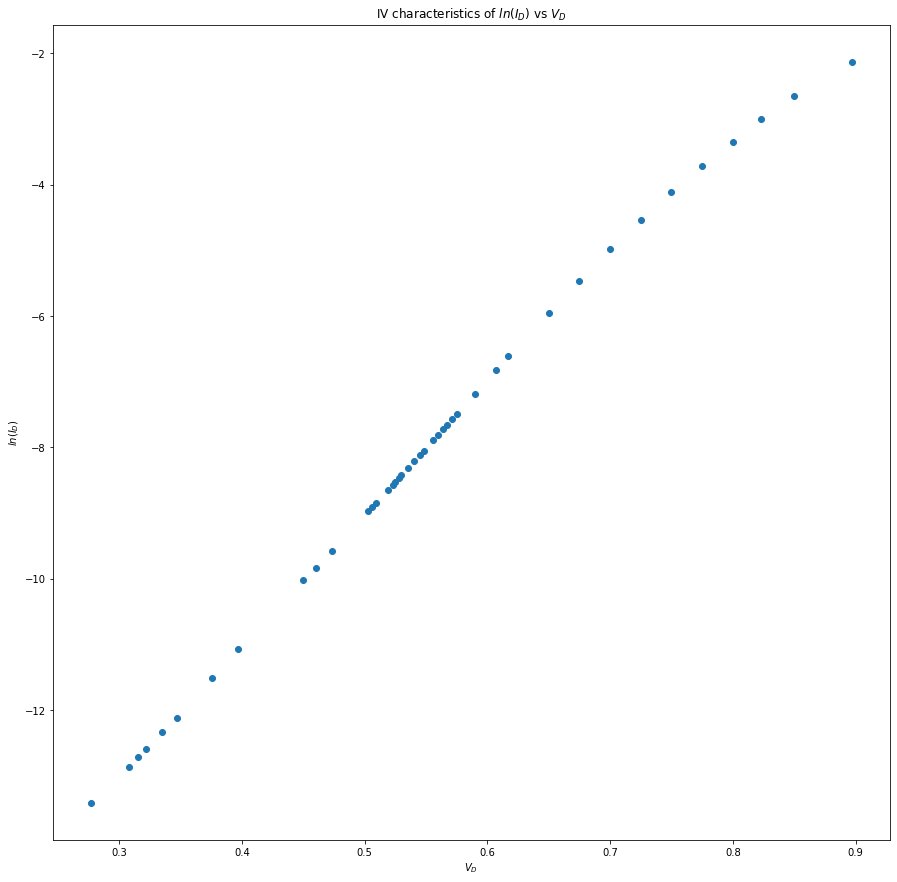

In [84]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
plt.title('IV characteristics of $ln(I_D)$ vs $V_D$')
plt.scatter(v_values,np.log(np.array(i_values)))
plt.xlabel('$V_D$')
plt.ylabel('$ln(I_D)$')
plt.show()

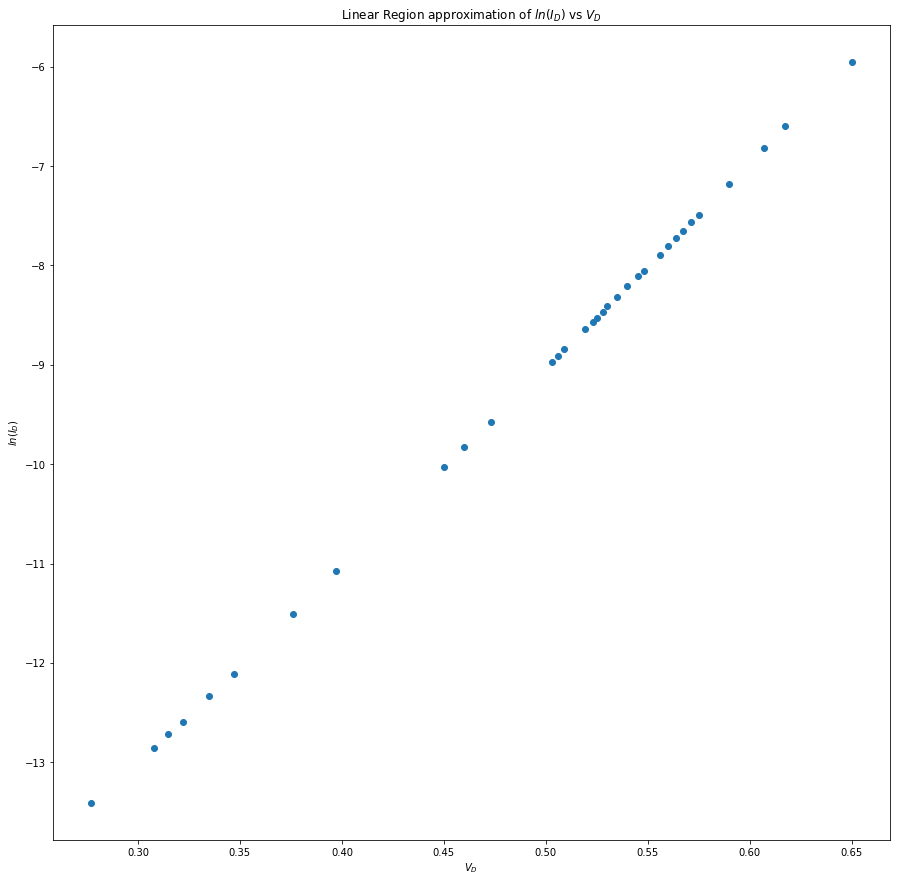

In [85]:
v_line = [i for i in v_values if i<=0.65]
i_line = i_values[:len(v_line)]
plt.title('Linear Region approximation of $ln(I_D)$ vs $V_D$')
plt.scatter(v_line,np.log(np.array(i_line)))
plt.xlabel('$V_D$')
plt.ylabel('$ln(I_D)$')
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(v_line).reshape(-1,1),np.log(np.array(i_line)))

LinearRegression()

In [87]:
print('slope(m):', model.coef_[0])
print('intercept(c):',model.intercept_)
m = model.coef_[0]
c = model.intercept_

slope(m): 20.11425910809806
intercept(c): -19.065782353914628


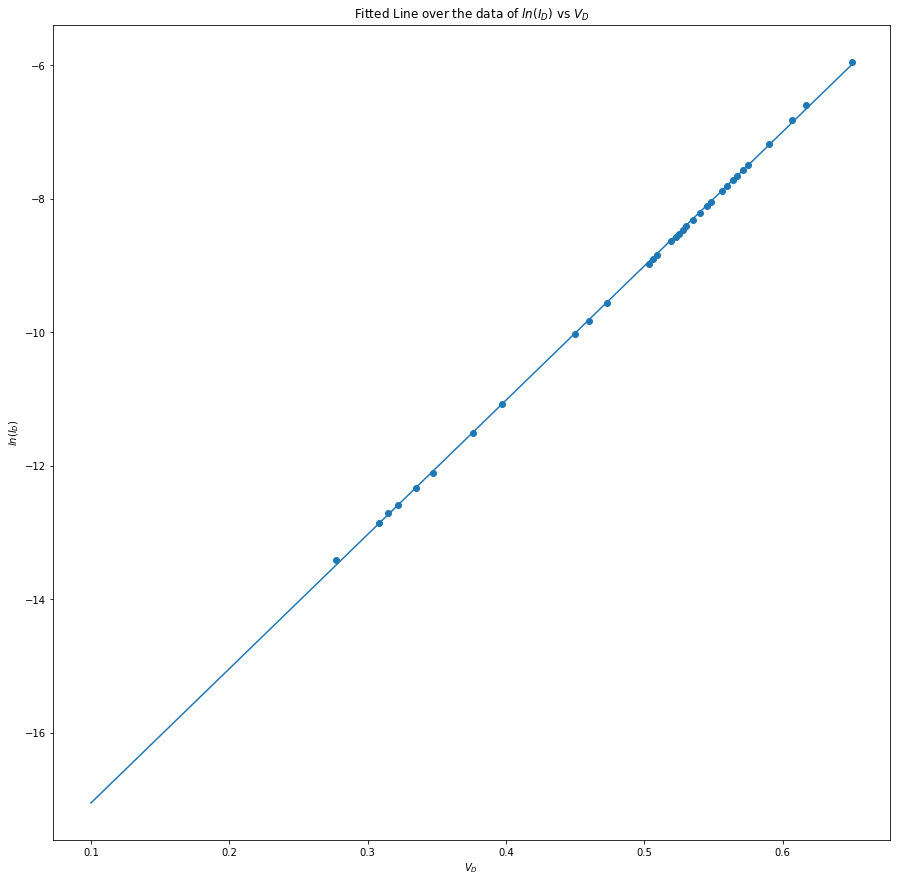

In [88]:
x_vals = np.linspace(0.1,0.65,1000)
y_vals = m*x_vals + c
plt.title('Fitted Line over the data of $ln(I_D)$ vs $V_D$')
plt.scatter(v_line,np.log(np.array(i_line)))
plt.plot(x_vals,y_vals)
plt.xlabel('$V_D$')
plt.ylabel('$ln(I_D)$')
plt.show()

In [89]:
V_T = 0.026

In [90]:
#log(I_S) = c
#1/nVT = m
I_s = np.exp(c)
n = 1/(m*V_T)
print("I_s:",I_s)
print("n:",n)

I_s: 5.246092338738586e-09
n: 1.912152878952113


In [91]:
I_D1 = min(i_line)
I_D2 = max(i_line)
print("Range of currents is I_D1 to I_D2:",I_D1,'A -',I_D2,'A')

Range of currents is I_D1 to I_D2: 1.5e-06 A - 0.00261 A


In [92]:
V_in2 = 10
R = V_in2/I_D2 
print("R:",R,'Ohms')

R: 3831.417624521073 Ohms


In [93]:
V_in1 = V_in2*(I_D1/I_D2)
print("V_in1:",V_in1,'V')
print("V_in2:",V_in2,'V')

V_in1: 0.005747126436781609 V
V_in2: 10 V


In [94]:
V_out1 = n*V_T*(np.log(I_s*R)-np.log(V_in1))
print("V_out1:",V_out1,'V')

V_out1: -0.2811804736959713 V


In [95]:
a1 = -n*V_T
a2 = n*V_T*np.log(I_s*R)

In [96]:
V_offset = a2/2
print("V_offset",V_offset,'V')

V_offset -0.2688339686078465 V


In [97]:
r3_by_r2 = -(1 + (1/a1))
print("R_3/R_2:",r3_by_r2)

R_3/R_2: 19.11425910809806


In [98]:
R_1 = 1e3
R_2 = 1e3
R_3 = 19.114e3
print("R_1:",R_1,'Ohms')
print("R_2:",R_2,'Ohms')
print("R_3:",R_3,'Ohms')

R_1: 1000.0 Ohms
R_2: 1000.0 Ohms
R_3: 19114.0 Ohms


In [99]:
#_______________________________________________________________________________________________________________
filename = "./simulation_readings"  
#_______________________________________________________________________________________________________________

x_axis_column_number = 1                     
y_axis_column_start = x_axis_column_number+1  

global readings
global x_readings
global y_readings

x_readings = []
y_readings = []

numbers =['0','1','2','3','4','5','6','7','8','9']

#This function read the file and returns the x and y axis values
def read_file(axis_index, filename):
    axis_readings = []
    readings_file = open(filename, "r")
    for x in readings_file:
        if x == "":
            continue
        elif not(x[0] in numbers):
            continue
        x = x.replace("\n", "")
        readings = [float(d) for d in x.split()]
        try:
            axis_readings.append(readings[axis_index])
        except:
            print("error")
            exit(0)
    return axis_readings

x_readings = read_file(x_axis_column_number,filename)
y_readings = []
for column in range(y_axis_column_start, 1 + y_axis_column_start):
    y_readings.append(read_file(column,filename))    
x_array = np.array(x_readings)
y_array = np.array(y_readings).flatten()

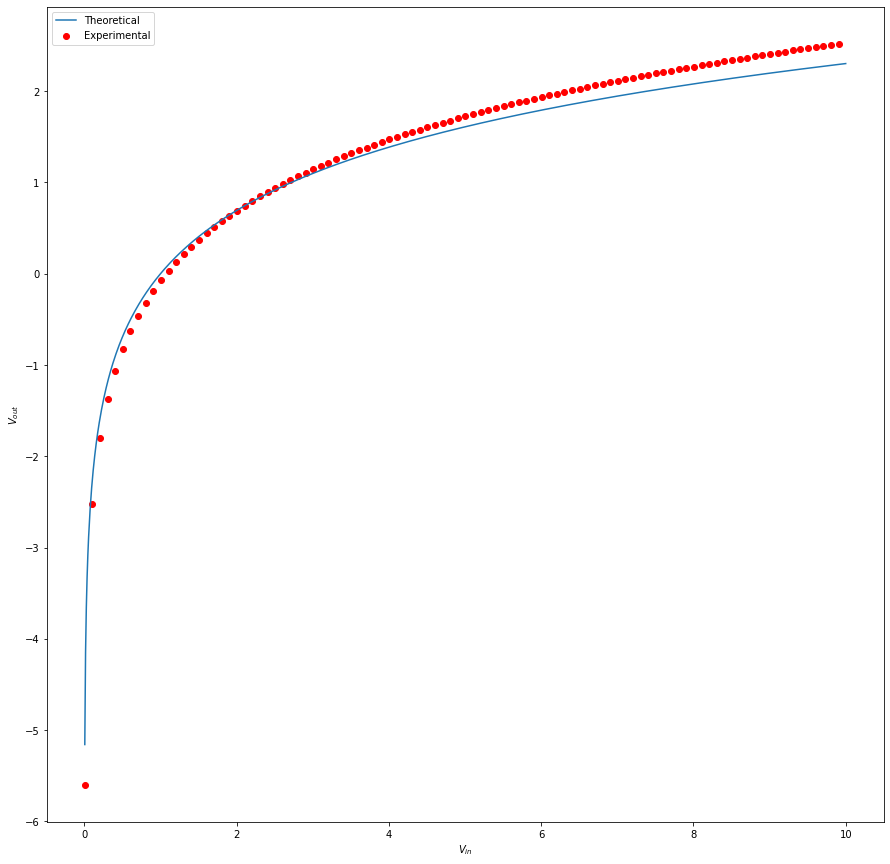

In [100]:
x_vals = np.linspace(V_in1,V_in2,1000)
plt.plot(x_vals, np.log(x_vals),label='Theoretical')
plt.scatter(x_array,y_array, color='red', label='Experimental')
plt.xlabel('$V_{in}$')
plt.ylabel('$V_{out}$')
plt.legend()
plt.show()